In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

In [2]:
data = pd.read_csv("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/ds-regression-project-2-main/ds-regression-project-2-main/data/COVID19_Qc_RapportINSPQ_HistoVigie.csv")
df = data.copy()

In [3]:
df.drop(0, inplace=True)
df.reset_index()
df = df[['Date','Nb_Cas_Cumulatif']]
df['index_col'] = df.reset_index().index
df = df.rename(columns={'Nb_Cas_Cumulatif': 'num_cases'})
df = df.rename(columns={'Date': 'date'})
df

,date,num_cases,index_col
1,2020-01-23,0,0
2,2020-01-24,0,1
3,2020-01-25,0,2
4,2020-01-26,0,3
5,2020-01-27,0,4
...,...,...,...
1076,2023-01-02,1286460,1075
1077,2023-01-03,1287392,1076
1078,2023-01-04,1288487,1077
1079,2023-01-05,1289368,1078


In [4]:
truncated_df = df.loc[(df['index_col']>=37) & (df['index_col']<=76)]
truncated_df['index_col'] = truncated_df.reset_index().index
truncated_df['treated'] = truncated_df['index_col'].apply(lambda row: row>19)
truncated_df['treated'] = truncated_df['treated'].apply(lambda row: int(row))
truncated_df

,date,num_cases,index_col,treated
38,2020-02-29,0,0,0
39,2020-03-01,0,1,0
40,2020-03-02,0,2,0
41,2020-03-03,0,3,0
42,2020-03-04,0,4,0
43,2020-03-05,0,5,0
44,2020-03-06,1,6,0
45,2020-03-07,1,7,0
46,2020-03-08,1,8,0
47,2020-03-09,1,9,0


In [5]:
untreated_df = truncated_df[truncated_df['treated']==0]
print(f"The number of samples before the lockdown is {len(untreated_df)}.")
untreated_df

The number of samples before the lockdown is 20.


,date,num_cases,index_col,treated
38,2020-02-29,0,0,0
39,2020-03-01,0,1,0
40,2020-03-02,0,2,0
41,2020-03-03,0,3,0
42,2020-03-04,0,4,0
43,2020-03-05,0,5,0
44,2020-03-06,1,6,0
45,2020-03-07,1,7,0
46,2020-03-08,1,8,0
47,2020-03-09,1,9,0


In [6]:
treated_df = truncated_df[truncated_df['treated']==1]
# treated_df['new_index_col'] = treated_df.reset_index().index
print(f"The number of samples after the lockdown is {len(treated_df)}.")
treated_df

The number of samples after the lockdown is 20.


,date,num_cases,index_col,treated
58,2020-03-20,149,20,1
59,2020-03-21,288,21,1
60,2020-03-22,459,22,1
61,2020-03-23,717,23,1
62,2020-03-24,937,24,1
63,2020-03-25,1186,25,1
64,2020-03-26,1530,26,1
65,2020-03-27,1963,27,1
66,2020-03-28,2368,28,1
67,2020-03-29,2868,29,1


### Linear regression for  pre-lockdown cases

In [218]:
X = untreated_df['index_col']
X = sm.add_constant(X)
y = untreated_df['num_cases']
est = sm.OLS(y,X).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     13.94
Date:                Mon, 09 Jan 2023   Prob (F-statistic):            0.00152
Time:                        15:42:52   Log-Likelihood:                -78.779
No. Observations:                  20   AIC:                             161.6
Df Residuals:                      18   BIC:                             163.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.6714      5.646     -1.713      0.104     -21.533       2.190
index_col      1.8970      0.508      3.734      0.002       0.830       2.964
==============================================================================
Omnibus:                       33.649   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.801
Skew:                           2.725   Prob(JB):                     2.10e-17
Kurtosis:                      10.903   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

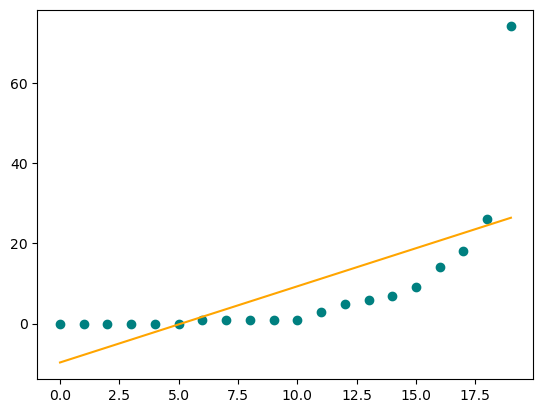

In [219]:
Xfit = untreated_df['index_col']
Xfit = sm.add_constant(Xfit)
yfit = est.predict(Xfit)
Xfit = np.squeeze(np.asarray(Xfit))
X = np.squeeze(np.asarray(X))
plt.scatter(X[:,1],y,color='teal')
plt.plot(Xfit[:,1],yfit,c='orange')
plt.show()

### Polynomial regression for  pre-lockdown cases

In [220]:
X1 = untreated_df['index_col']
X1 = sm.add_constant(X1)
X1 = np.squeeze(np.asarray(X1))
X1 = np.concatenate([X1, np.square(X1[:,1]).reshape(20,1)],axis=1)
y1 = untreated_df['num_cases']
est = sm.OLS(y1,X1).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     21.07
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           2.50e-05
Time:                        15:42:54   Log-Likelihood:                -72.047
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      17   BIC:                             153.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0656      5.863      1.205      0.245      -5.303      19.434
x1            -3.6820      1.430     -2.574      0.020      -6.699      -0.665
x2             0.2936      0.073      4.041      0.001       0.140       0.447
==============================================================================
Omnibus:                       21.142   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.505
Skew:                           1.818   Prob(JB):                     3.92e-07
Kurtosis:                       7.711   Cond. No.                         467.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

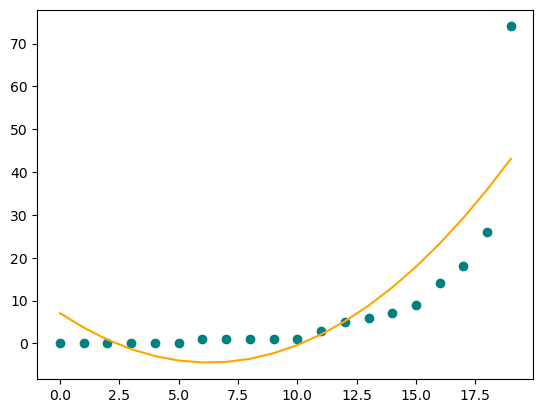

In [221]:
Xfit1 = untreated_df['index_col']
Xfit1 = sm.add_constant(Xfit1)
Xfit1 = np.squeeze(np.asarray(Xfit1))
Xfit1 = np.concatenate([Xfit1, np.square(Xfit1[:,1]).reshape(20,1)],axis=1)
yfit1 = est.predict(Xfit1)
X1 = np.squeeze(np.asarray(X1))
plt.scatter(X1[:,1],y1,color='teal')
plt.plot(Xfit1[:,1],yfit1,c='orange')
plt.show()

### Linear regression for  post-lockdown cases

In [222]:
X = treated_df['index_col']
X = sm.add_constant(X)
y = treated_df['num_cases']
est = sm.OLS(y,X).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     580.8
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           3.77e-15
Time:                        15:42:56   Log-Likelihood:                -153.07
No. Observations:                  20   AIC:                             310.1
Df Residuals:                      18   BIC:                             312.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -1.1e+04    626.646    -17.557      0.000   -1.23e+04   -9685.690
index_col    502.4398     20.848     24.100      0.000     458.640     546.239
==============================================================================
Omnibus:                        1.070   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.962
Skew:                           0.356   Prob(JB):                        0.618
Kurtosis:                       2.196   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

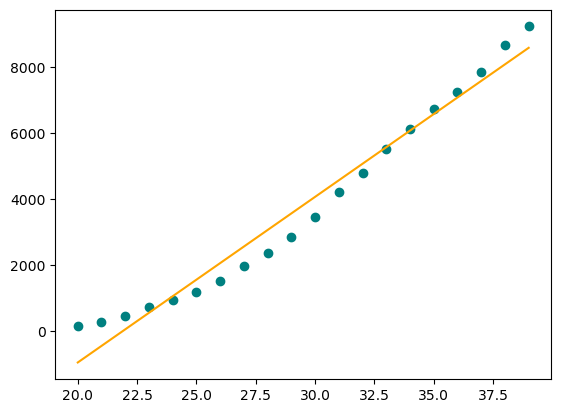

In [223]:
Xfit = treated_df['index_col']
Xfit = sm.add_constant(Xfit)
yfit = est.predict(Xfit)
Xfit = np.squeeze(np.asarray(Xfit))
X = np.squeeze(np.asarray(X))
plt.scatter(X[:,1],y,color='teal')
plt.plot(Xfit[:,1],yfit,c='orange')
plt.show()

### Polynomial regression for  post-lockdown cases

In [224]:
X2 = treated_df['index_col']
X2 = sm.add_constant(X2)
X2 = np.squeeze(np.asarray(X2))
X2 = np.concatenate([X2, np.square(X2[:,1]).reshape(20,1)],axis=1)
y2 = treated_df['num_cases']
est = sm.OLS(y2,X2).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2756.
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           4.43e-22
Time:                        15:42:58   Log-Likelihood:                -130.27
No. Observations:                  20   AIC:                             266.5
Df Residuals:                      17   BIC:                             269.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2649.3703   1136.593      2.331      0.032     251.369    5047.372
x1          -459.8590     79.086     -5.815      0.000    -626.717    -293.001
x2            16.3102      1.335     12.214      0.000      13.493      19.128
==============================================================================
Omnibus:                        2.663   Durbin-Watson:                   0.405
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                1.211
Skew:                           0.140   Prob(JB):                        0.546
Kurtosis:                       1.827   Cond. No.                     2.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

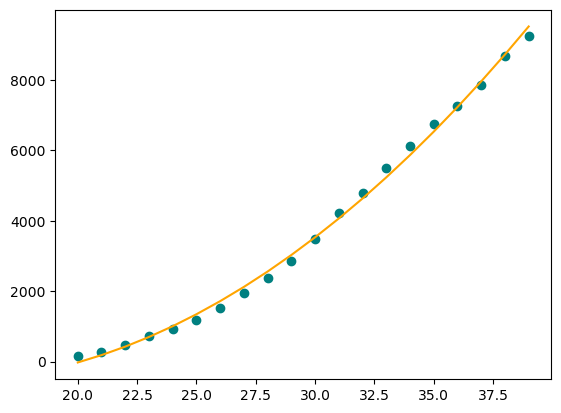

In [225]:
Xfit2 = treated_df['index_col']
Xfit2 = sm.add_constant(Xfit2)
Xfit2 = np.squeeze(np.asarray(Xfit2))
Xfit2 = np.concatenate([Xfit2, np.square(Xfit2[:,1]).reshape(20,1)],axis=1)
yfit2 = est.predict(Xfit2)
X2 = np.squeeze(np.asarray(X2))
plt.scatter(X2[:,1],y2,color='teal')
plt.plot(Xfit2[:,1],yfit2,c='orange')
plt.show()

### Measure of causal effect of lockdown

In [226]:
X = truncated_df['treated']
X = sm.add_constant(X)
y = truncated_df['num_cases']
est = sm.OLS(y,X).fit()
summary = est.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_cases   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     31.89
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.73e-06
Time:                        15:43:00   Log-Likelihood:                -362.37
No. Observations:                  40   AIC:                             728.7
Df Residuals:                      38   BIC:                             732.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3500    477.224      0.017      0.986    -957.739     974.439
treated     3811.4000    674.897      5.647      0.000    2445.143    5177.657
==============================================================================
Omnibus:                        3.773   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.543
Skew:                           0.552   Prob(JB):                        0.280
Kurtosis:                       3.555   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estimated effect of lockdown measures
#### The constant 3811.40 represents the causal effect of the lockdown, with a p-value near 0 and under 0.05 of 1.73e-06.

In [227]:
pval = est.pvalues["treated"]
print("P-value:", pval)

P-value: 1.7341441853964492e-06


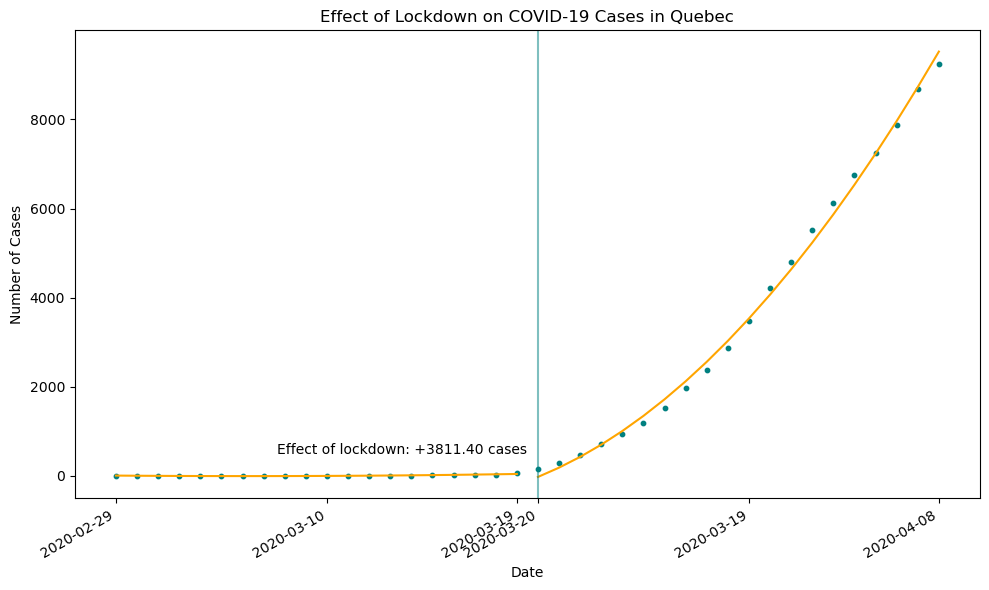

In [230]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X1[:,1],y1,color='teal',s=10)
ax.plot(Xfit1[:,1],yfit1,c='orange')
ax.scatter(X2[:,1],y2,color='teal',s=10)
ax.plot(Xfit2[:,1],yfit2,c='orange')
ax.set_title('Effect of Lockdown on COVID-19 Cases in Quebec')
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Date')
ax.set_xticks([0,10,19,20,30,39])
ax.set_xticklabels(['2020-02-29','2020-03-10','2020-03-19','2020-03-20','2020-03-19','2020-04-08'])
ax.text(19.5,500,'Effect of lockdown: +3811.40 cases',fontsize=10,horizontalalignment='right')
ax.axvline(20,0,3,color='teal',alpha=0.5)
fig.autofmt_xdate()
fig.tight_layout()